In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

In [2]:
import pickle
filename = 'C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\datasetHSV.pkl'
df = pickle.load(open(filename, 'rb'))

In [3]:
working_df = df.copy()
working_df = working_df[np.isin(working_df['label'], ['cat', 'dog'])]
print(working_df['label'].value_counts())

dog    4863
cat    1668
Name: label, dtype: int64


In [4]:
print(working_df.columns)

Index(['label', 'img_hsv'], dtype='object')


In [5]:
size=180
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.resize(x, (size, size)))
print(working_df['img_hsv'].apply(lambda x: x.shape).unique().shape)

(1,)


In [6]:
#hsv to gray
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_HSV2RGB))
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY))

In [7]:
#img to array
print(working_df['img_hsv'].shape)
print(working_df['img_hsv'].iloc[0].shape)
print(type(working_df['img_hsv']))
print(type(working_df['img_hsv'].iloc[0]))
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: x.reshape(-1))
X = working_df['img_hsv'].values
X = np.stack(X)

(6531,)
(180, 180)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
working_df['label'] = le.fit_transform(working_df['label']) # 0 cat, 1 dog
print(working_df['label'].value_counts())

1    4863
0    1668
Name: label, dtype: int64


In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, working_df['label'], test_size=0.2)


In [10]:
pickle.dump(X_test, open('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\X_test.pkl', 'wb'))
pickle.dump(y_test, open('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\y_test.pkl', 'wb'))

In [11]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))

(5224, 32400)
(5224,)
<class 'numpy.ndarray'>


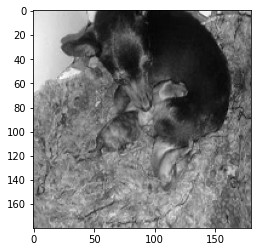

In [12]:
#impression image 
hsv = working_df['img_hsv'].iloc[2000].reshape(size,size)
plt.imshow(hsv, cmap='gray')

In [15]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 12.76652923
Iteration 2, loss = 13.68441812


C:\Users\Eliaz\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, verbose=True)

In [ ]:
pickle.dump(clf, open('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\MLPC.pkl', 'wb'))